<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Accuracy-Metrics" data-toc-modified-id="Accuracy-Metrics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Accuracy Metrics</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#$r^2$-value" data-toc-modified-id="$r^2$-value-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>$r^2$ value</a></span></li></ul></li><li><span><a href="#Discussion:-What-does-a-negative-$r^2$-mean?" data-toc-modified-id="Discussion:-What-does-a-negative-$r^2$-mean?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Discussion: What does a negative $r^2$ mean?</a></span><ul class="toc-item"><li><span><a href="#Mean-absolute-error-(MAE)" data-toc-modified-id="Mean-absolute-error-(MAE)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Mean absolute error (MAE)</a></span></li><li><span><a href="#Root-mean-sqaured-error-(RMSE)" data-toc-modified-id="Root-mean-sqaured-error-(RMSE)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Root-mean-sqaured error (RMSE)</a></span></li><li><span><a href="#Maximum-error" data-toc-modified-id="Maximum-error-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Maximum error</a></span></li><li><span><a href="#Parity-plots" data-toc-modified-id="Parity-plots-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Parity plots</a></span></li><li><span><a href="#Error-Histogram" data-toc-modified-id="Error-Histogram-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Error Histogram</a></span></li></ul></li><li><span><a href="#Exercise:-Create-a-parity-plot-for-each-dataset-in-Anscomb's-quartet." data-toc-modified-id="Exercise:-Create-a-parity-plot-for-each-dataset-in-Anscomb's-quartet.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercise: Create a parity plot for each dataset in Anscomb's quartet.</a></span></li></ul></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cross Validation</a></span><ul class="toc-item"><li><span><a href="#Hold-out-cross-validation" data-toc-modified-id="Hold-out-cross-validation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hold out cross validation</a></span></li><li><span><a href="#k-fold-Cross-Validation" data-toc-modified-id="k-fold-Cross-Validation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>k-fold Cross Validation</a></span></li><li><span><a href="#Exercise:-Use-8-fold-cross-validation-with-$\sigma=150$-to-compute-the-average-and-standard-deviation-of-the-mean-absolute-error-across-the-8-runs." data-toc-modified-id="Exercise:-Use-8-fold-cross-validation-with-$\sigma=150$-to-compute-the-average-and-standard-deviation-of-the-mean-absolute-error-across-the-8-runs.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exercise: Use 8-fold cross-validation with $\sigma=150$ to compute the average and standard deviation of the mean absolute error across the 8 runs.</a></span></li></ul></li><li><span><a href="#Quantifying-Error-and-Uncertainty" data-toc-modified-id="Quantifying-Error-and-Uncertainty-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Quantifying Error and Uncertainty</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation-of-Error" data-toc-modified-id="Standard-Deviation-of-Error-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standard Deviation of Error</a></span></li><li><span><a href="#Discussion:-Are-these-uncertainty-bounds-valid-for-all-datasets-in-Anscomb's-quartet?" data-toc-modified-id="Discussion:-Are-these-uncertainty-bounds-valid-for-all-datasets-in-Anscomb's-quartet?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Discussion: Are these uncertainty bounds valid for all datasets in Anscomb's quartet?</a></span></li><li><span><a href="#Resampling-or-&quot;bootstrapping&quot;" data-toc-modified-id="Resampling-or-&quot;bootstrapping&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Resampling or "bootstrapping"</a></span></li><li><span><a href="#Gaussian-Process-Regression" data-toc-modified-id="Gaussian-Process-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gaussian Process Regression</a></span></li></ul></li></ul></div>

# Model Validation

So far we have seen lots of regression models, and we have assessed their quality using visualization, sum of squared errors, and $r^2$. However, we haven't really discussed what these metrics mean, or discussed alternatives. Before analyzing our real data, we will first look at a well-known toy dataset called Anscomb's quartet:

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

Anscomb's quartet is interesting because the statistics of all 4 datasets are the same!

In [2]:
def calc_stats(x,y):    
    y_bar = np.mean(y)
    y_std = np.std(x)
    m, b = np.polyfit(x,y,deg=1)
    SST = sum((y - y_bar)**2)
    SSE = sum((y - (m*x+b))**2)
    R2 = (SST - SSE)/SST
    return y_bar, y_std, m, b, R2

stats1 = calc_stats(x,y1)
print("Dataset 1: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats1))
stats2 = calc_stats(x,y2)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats2))
stats3 = calc_stats(x,y3)
print("Dataset 3: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats3))
stats4 = calc_stats(x4,y4)
print("Dataset 4: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats4))
avg, std, m, b, r2 = stats1

Dataset 1: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 3: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 4: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67


However, the datasets themselves are very different:

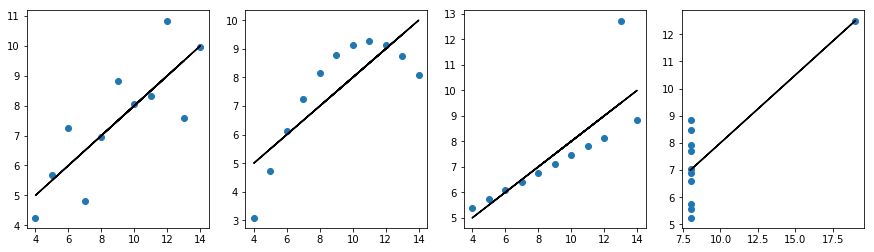

In [3]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(x,y1)
axes[0].plot(x, yhat, ls='-', color='k')
axes[1].scatter(x,y2)
axes[1].plot(x, yhat, ls='-', color='k')
axes[2].scatter(x,y3)
axes[2].plot(x, yhat, ls='-', color='k')
axes[3].scatter(x4,y4)
axes[3].plot(x4, m*x4 + b, ls='-', color='k');

## Accuracy Metrics

It is important to consider the context of a regression model and choose accuracy metrics that are relevant to its application. There are several common options:

* #### $r^2$ value

The $r^2$ metric is very common in regression models, and is the default "score" in `scikit-learn`. $r^2$ varies from 0-1, with higher values corresponding to better models. The $r^2$ value corresponds to the amount of variance in the independent variable that is explained by the model, and is defined as:

$r^2 = \frac{\sum_{i=0}^N (y_i - \bar{y})^2 - \sum_{i=0}^N (y_i - \hat{y}_i)^2}{\sum_{i=0}^N (y_i - \bar{y})^2}$

where $\bar{y}$ is the mean of $y$. This is often written as:

$r^2 = \frac{SST - SSE}{SST}$

where $SST = \sum_{i=0}^N (y_i - \bar{y})^2$ and $SSE = \sum_{i=0}^N (y_i - \hat{y}_i)^2$

we can also think of this as the percent difference in squared error between our model, $\hat{y}_i$, and "no model", or just guessing that $y_i = \bar{y}$. If the sum of squared error for our model is not significantly lower than the sum of squared error when we just guess that $y_i = \bar{y}$ then the model is not very good.

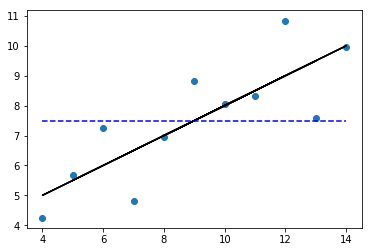

In [4]:
fig, ax = plt.subplots()
yhat = m*x + b
ax.scatter(x,y1)
ax.plot(x, yhat, ls='-', color='k')
ax.plot([min(x),max(x)], [np.mean(y1), np.mean(y1)], '--b')

### Discussion: What does a negative $r^2$ mean?

* #### Mean absolute error (MAE)

$MAE = \frac{1}{N} \sum_{i=0}^N |y_i - \hat{y}_i|$

* #### Root-mean-sqaured error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum_{i=0}^N (y_i - \hat{y}_i)^2}$

MAE and RMSE are very similar. Both have units of the dependent variable ($y$), and can vary from 0 to $\infty$ with lower values being better. MAE is less affected by outliers and sample size, but it is always lower than RMSE, so it is a less conservative estimate. MAE and RMSE are related by the inequalities:

$MAE \leq RMSE \leq MAE \times \sqrt{N}$

* #### Maximum error

Sometimes it is useful to assess the maximum error of a model, $max(\epsilon_i)$. This is useful to assess a worst-case scenario, and provides a conservative estimate of model performance.

* #### Parity plots

Plotting $y$ vs. $\hat{y}$ provides a visual analysis of the error. This can be particularly useful if your model is highly non-linear or has more than one input variable:

Text(0,0.5,'Predicted Value')

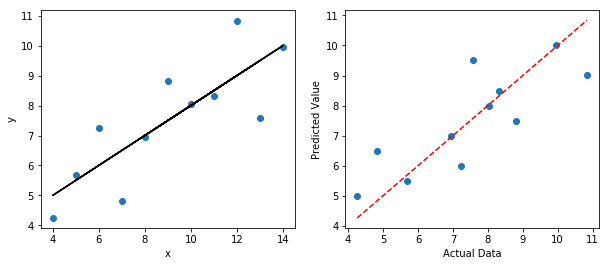

In [5]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
yhat = m*x + b

axes[0].scatter(x,y1)
axes[0].plot(x, yhat, ls='-', color='k')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].scatter(y1, yhat)
axes[1].plot([min(y1), max(y1)], [min(y1), max(y1)], ls='--', color='r')
axes[1].set_xlabel('Actual Data')
axes[1].set_ylabel('Predicted Value')

* #### Error Histogram

You can create a histogram of the error between the model and the actual data. This can provide insight into whether the error is normally distributed or not.

(array([2., 0., 0., 1., 3., 2., 0., 0., 2., 1.]),
 array([-1.92127273, -1.54526364, -1.16925455, -0.79324545, -0.41723636,
        -0.04122727,  0.33478182,  0.71079091,  1.0868    ,  1.46280909,
         1.83881818]),
 <a list of 10 Patch objects>)

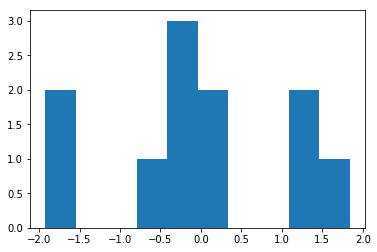

In [6]:
fig, ax = plt.subplots()
yhat = m*x + b
ax.hist(y1 - yhat, bins=10)

Computing quantitative metrics is a useful strategy, but you should always visualize your result to check for patterns in the error. Most regression model assume that the error distribution is:

* normally distributed: follows a Gaussian distribution with a mean of 0.
* homoscedastic: the standard deviation of the Gaussian distribution does not depend on the independent variable.

Text(0,0.5,'y')

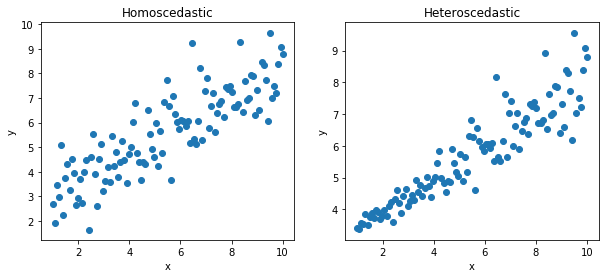

In [7]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
x_new = np.linspace(1, 10, 110)
yhat_new = m*x_new + b
noise = np.random.normal(size=len(x_new), loc=0, scale=1)
y_homoscedastic = yhat_new + noise
y_heteroscedastic = yhat_new + noise*x_new*0.1

axes[0].scatter(x_new, y_homoscedastic)
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].scatter(x_new, y_heteroscedastic)
axes[1].set_title('Heteroscedastic')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

### Exercise: Create a parity plot for each dataset in Anscomb's quartet.

## Cross Validation

In the prior examples we computed error metrics for models that were trained with all available data. However, what we are really concerned with is how the model will perform on new data. Measuring new datapoints is often impractical when creating statistical models, but we can simulate this using "cross validation". In cross validation,  some examples ("test" examples) are hidden when the model is fit to "training" examples. Then, the loss function is assessed on the data that was hidden to see if the model is able to predict it.

There are many strategies for cross-validation:

* hold-out: randomly leave out a percentage (usually ~30%) of the data during training.
* k-fold: select `k` (usually 3-5) randomly-assigned sub-groups of data, and train `k` times holding each group out.
* leave p out: leave `p` (usually 1) samples out of the training and assess the error for the `p` that were left out. Repeat for all possible `p` subsets of the sample.
* bootstrapping: random selection with replacement to generate a sample of the same size as the original dataset, with a number of repetitions.

Different techniques can be used depending on how much data you have, and how much time you are willing to spend. Hold-out is fast and simple, but is susceptible to random good/bad subsamples, especially if the dataset is small. k-fold cross-validation alleviates the good/bad sample problem, but takes more time and effort. The "leave p out" approach is very computationally expensive if $p>1$. In the end, doing *any* cross validation is always better than doing *no* cross-validation, and it is usually a good idea to try a few approaches to convince yourself that your conclusions are not sensitive to the cross-validation approach you use.

All cross-validation techniques are based on an important (and often violated) assumption: *The collected data is representative of future data.* An example of when this might be violated in chemical engineering is that you have data collected at a given set of process conditions and build a model, but the process conditions are expected to when the model is applied.

### Hold out cross validation

Let's start by revisiting our spectrum dataset:

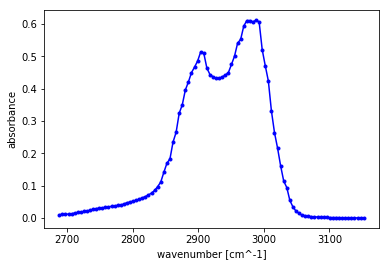

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-b', marker='.')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

We will start by looking at the case of regression with "radial basis function" kernels:

In [9]:
def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X

We will revisit the problem of trying to determine the width of the kernels:

r^2 training = 1.0
r^2 testing = 0.9984890582179191


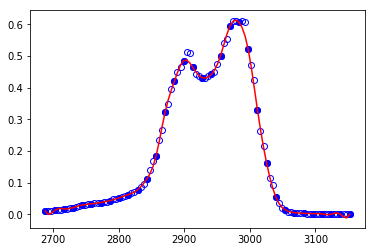

In [10]:
from sklearn.linear_model import LinearRegression

spacing = 3
sigma = 10
gamma = 1./(2*sigma**2)

x_train = x_peak[::spacing]
y_train = y_peak[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_peak, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_peak) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'ob', markerfacecolor='none')
ax.plot(x_train, y_train, 'ob')
ax.plot(x_peak, yhat_rbf, '-r')

We can see that in this case we are actually doing a specific kind of "hold out", since we are training on every 3rd point, and testing on all the data. In standard hold out, we would randomly select some subset (usually ~60-80%) for *training* and use the remaining data for *testing*. This can get tedious to code, but luckily `scikit-learn` has some tools to help us:

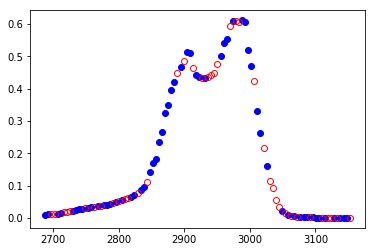

In [11]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size=0.4)

fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'ob')
ax.plot(x_test, y_test, 'or', markerfacecolor='none');

Note the `np.random.seed(0)` line makes this cell run the same every time. If you remove it then it will give a different answer each time, or if you change the "seed" from 0 then you will get a different answer (but it will not change each time).

Now let's train on our train set and test on the test set:

r^2 training = 1.0
r^2 testing = -4561.07038644804


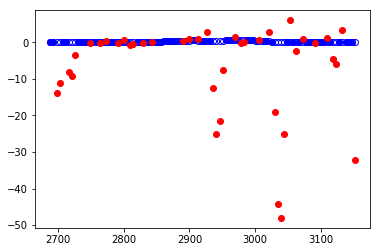

In [12]:
sigma = 10
gamma = 1./(2*sigma**2)

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_test = rbf(x_train, x_test=x_test, gamma=gamma)

yhat_rbf = model_rbf.predict(X_test) #create the model prediction

r2 = model_rbf.score(X_test, y_test) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'ob', markerfacecolor='none')
ax.plot(x_train, y_train, 'ob')
ax.plot(x_test, yhat_rbf, 'or')

We see that the model performs very poorly on the testing data if `sigma` is not chosen well. We can also visualize this with a parity plot:

Text(0.5,0,'Predicted Value')

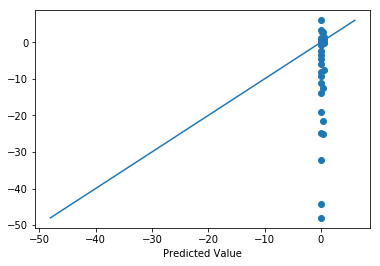

In [13]:
fig, ax = plt.subplots()

ax.scatter(y_test, yhat_rbf)
ax.plot([min(yhat_rbf), max(yhat_rbf)],[min(yhat_rbf), max(yhat_rbf)])
ax.set_xlabel("Actual Value")
ax.set_xlabel("Predicted Value")

### k-fold Cross Validation

Another approach is to use k-fold cross-validation. In this case, we get multiple estimates of the accuracy by repeating the holdout process with `k` different sub-samples of the data. Coding k-fold cross validation is even trickier than hold out, so we will use `scikit-learn` again:

r^2 training = 0.9985655779731549
r^2 testing = -31661859.856058914
r^2 training = 0.9988397321311897
r^2 testing = 0.4643915436011644
r^2 training = 0.9988982887213956
r^2 testing = -0.02540223110580819
r^2 training = 0.9991328789910029
r^2 testing = 0.8417192759196784
r^2 training = 0.9986326951498015
r^2 testing = -9490729022.068981
[-31661859.856058914, 0.4643915436011644, -0.02540223110580819, 0.8417192759196784, -9490729022.068981]


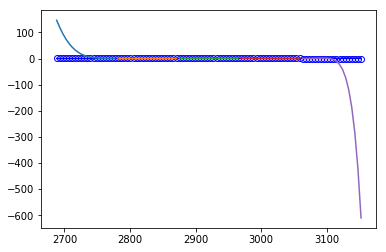

In [14]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
sigma = 100
gamma = 1./(2*sigma**2)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '-ob', markerfacecolor='none')

r2_test = []

for train_index, test_index in kf.split(x_peak):
    x_train, x_test = x_peak[train_index], x_peak[test_index]
    y_train, y_test = y_peak[train_index], y_peak[test_index]
    
    X_train = rbf(x_train, gamma=gamma)

    model_rbf = LinearRegression() #create a linear regression model instance
    model_rbf.fit(X_train, y_train) #fit the model
    r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
    print('r^2 training = {}'.format(r2))

    X_test = rbf(x_train, x_test=x_test, gamma=gamma)

    yhat_rbf = model_rbf.predict(X_test) #create the model prediction

    r2 = model_rbf.score(X_test, y_test) #get the "score", which is equivalent to r^2
    print('r^2 testing = {}'.format(r2))
    r2_test.append(r2)
    
    ax.plot(x_test, yhat_rbf)
    
print(r2_test)

When we use k-fold cross-validation we can see that the results depend a lot on exactly which test/train split we chose. In particular, if the end points are not included in the training set then the model tries to extrapolate and fails catastrophically. The advantage of k-fold cross-validation is it is harder to get lucky with your test/train split and accidentally find a split that makes your model look good. However, there is a tradeoff between number of splits and size of the split.

### Exercise: Use 8-fold cross-validation with $\sigma=150$ to compute the average and standard deviation of the mean absolute error across the 8 runs.

## Quantifying Error and Uncertainty

In addition to model accuracy, it is often useful to have an estimate of the model error at a new predicted point. This is a slightly different problem, and we will look at a few approaches. We will go back to Anscomb's quartet to illustrate these more clearly.

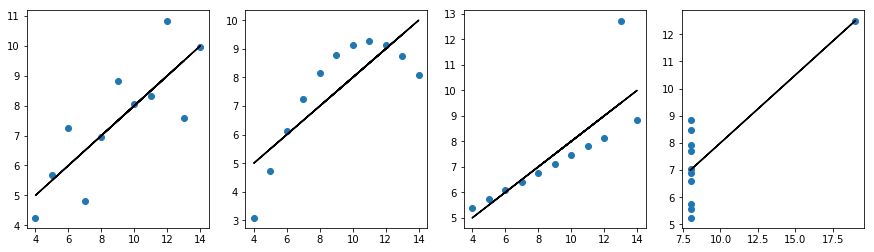

In [15]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(x,y1)
axes[0].plot(x, yhat, ls='-', color='k')
axes[1].scatter(x,y2)
axes[1].plot(x, yhat, ls='-', color='k')
axes[2].scatter(x,y3)
axes[2].plot(x, yhat, ls='-', color='k')
axes[3].scatter(x4,y4)
axes[3].plot(x4, m*x4 + b, ls='-', color='k');

### Standard Deviation of Error

One simple way of quantifying uncertainty is to assess the standard deviation of the error:

In [16]:
error_stdev = np.std(y3 - yhat, ddof=2)
print(error_stdev)

1.2363120050122354


Note that we used `ddof=2` here, since we have 2 degrees of freedom removed due to the 2 parameters in the model. This doesn't really matter if you have very large datasets, but since these datasets are small (only 11 points) we need to account for it. Also note that the standard deviation is the same for each dataset in Anscomb's quartet.

We can use the following expression to account for how the uncertainty changes as a function of $x$:

$\vec{\sigma_y} = \sigma_{error} \sqrt{\left(1 + \frac{1}{n} + \frac{(\vec{x}-\bar{x})^2}{(\sum_j x_j - \bar{x})^2} \right)}$

where $\sigma_{error}$ is the standard deviation of the error.

However, this is only valid under the case that all assumptions of linear regression hold:

* Error is normally distributed
* Error is homoscedastic
* The relationship between the variables is linear

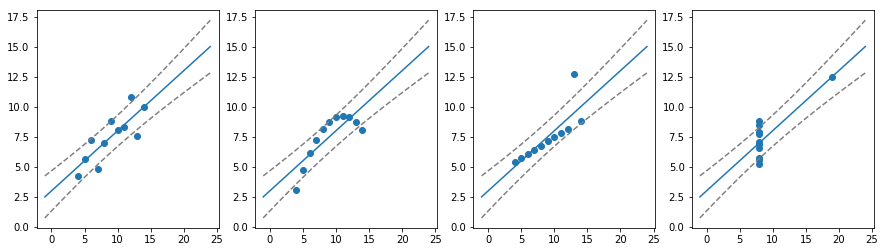

In [17]:
def regression_error(x,y, x_data, yhat):
    sigma_error = np.std(y-yhat, ddof=2)
    xbar = np.mean(x_data)
    y_error = sigma_error * np.sqrt(1 + 1/len(y) + ((x-xbar)**2)/(np.sum((x_data-xbar)**2)))
    return y_error

x_dense = np.linspace(min(x)-5,max(x4)+5,50)

y_error = regression_error(x_dense,y1, x, m*x+b)

fig, axes = plt.subplots(1,4,figsize=(15,4))

axes[0].scatter(x,y1)
axes[1].scatter(x,y2)
axes[2].scatter(x,y3)
axes[3].scatter(x4,y4)

for ax in axes:
    ax.plot(x_dense, m*x_dense+b)
    ax.plot(x_dense, m*x_dense+b + y_error, ls='--', color='0.5')
    ax.plot(x_dense, m*x_dense+b - y_error, ls='--', color='0.5')

### Discussion: Are these uncertainty bounds valid for all datasets in Anscomb's quartet?

### Resampling or "bootstrapping"

Another possibility that avoids the assumptions of homoskedastic and normally-distributed errors is to use resampling techniques to generate a distribution of models. These models have distributions of parameters that capture the deviations in the data

There are many ways to achieve this, but one of the most popular is "bootstrapping". In a bootstrapping approach the data is re-sampled by choosing the same number of points `N` randomly from the real dataset, but this is done **with replacement** so that each re-sample is slightly different.

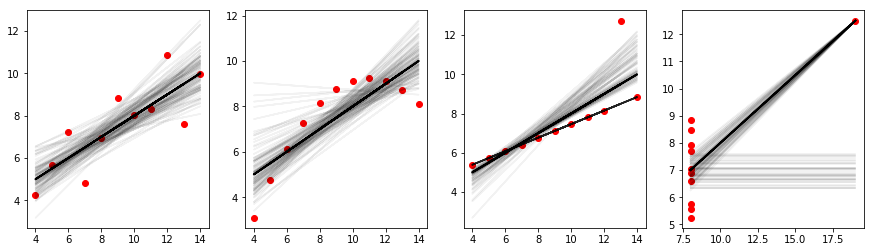

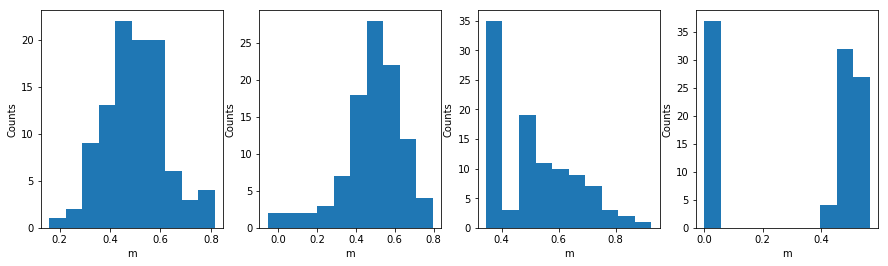

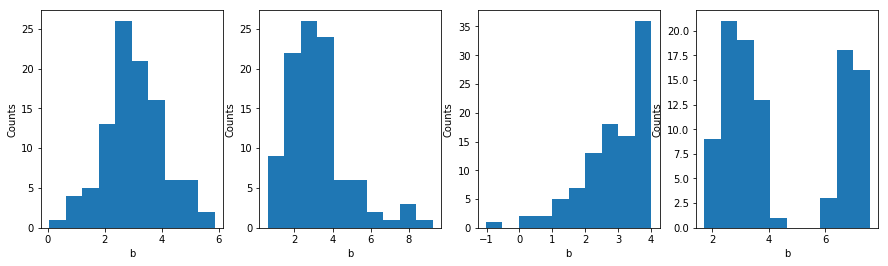

In [18]:
from numpy.random import choice #<- randomly select items from a list

def bootstrap_linregress(x_all,y_all,N):
    m_list = []
    b_list = []
    for n in range(N):
        subset = choice(range(len(x_all)),size=len(x_all),replace=True)
        xprime = [x_all[j] for j in subset]
        yprime = [y_all[j] for j in subset]
        if np.std(xprime) > 0:
            m, b = np.polyfit(xprime,yprime,deg=1)
        else:
            m = 0
            b = np.mean(yprime)
        
        m_list.append(m)
        b_list.append(b)
    return m_list, b_list

anscombs = [[x,y1],[x,y2],[x,y3],[x4,y4]]
fig, axes = plt.subplots(1,4,figsize=(15,4))
fig_m, axes_m = plt.subplots(1,4,figsize=(15,4))
fig_b, axes_b = plt.subplots(1,4,figsize=(15,4))

N = 100

for i, xy in enumerate(anscombs):
    xi, yi = xy
    m, b = np.polyfit(xi,yi,deg=1)
    axes[i].scatter(xi,yi, color = 'r')
    axes[i].plot(xi,m*xi+b, color='k', lw=2)

    
    m_list, b_list = bootstrap_linregress(xi,yi,N)
    for mj, bj in zip(m_list,b_list):
        axes[i].plot(xi, mj*xi+bj, color='k', alpha=0.05)
        
    axes_m[i].hist(m_list)
    axes_m[i].set_xlabel('m')
    axes_m[i].set_ylabel('Counts')
    axes_b[i].hist(b_list)
    axes_b[i].set_xlabel('b')
    axes_b[i].set_ylabel('Counts')

You don't need to understand all the details of this code block, but should understand the general idea. Re-sampling is closely related to cross-validation. We hide some of the data from the model and see how the model changes. The difference is that we keep the **models**, rather than just analyzing the errors. Then we can use the models to give a range of estimates, or check the parameters of the models to see how much parameters change depending on the data.

This approach is very powerful because it allows us to get estimates of the prediction error as well as the error distribution of the parameters.

### Gaussian Process Regression

Gaussian process regression (GPR) is an extension of kernel regression that uses the distance of prediction points from the training points to estimate errors. The math behind this is beyond the scope of this course, but we will briefly demonstrate it for the spectra dataset:

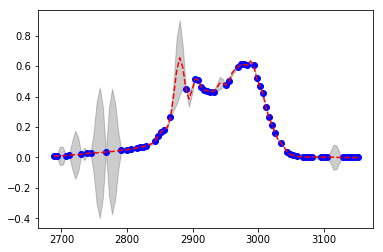

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

x_peak = x_peak.reshape(-1,1)
y_peak = y_peak.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size=0.4)

gpr = GaussianProcessRegressor(kernel=RBF(1), alpha=0.000005)

gpr.fit(x_train,y_train)

y_gpr, y_std = gpr.predict(x_peak, return_std=True)

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'ob')
ax.plot(x_peak, y_gpr, '--r')
ax.fill_between(x_peak[:,0], y_gpr[:,0] - y_std, y_gpr[:,0] + y_std, color='k',alpha=0.2);

GPR is great for estimating uncertainty, but it is very sensitive to the input parameters and can be quite slow. We will not cover it in this course, but it is worth knowing about if you want to estimate uncertainty.